# One Hot Encoading
One of the most interesting applications of Machine Learning and Deep Learning can be found in the field of Natural Language Processing (NLP). Many tasks in NLP involve working with texts and sentences which are understood as sequence of texts. But the Neural Networks which are part of Machine Learning models require their input in tensors or vectors whose constituent elements are in numerical form. So how is the data present in the form of text fed as input to such a neural network model? One of the methods which enables us to do this, and we will discuss below is called One Hot encoding.

In one hot encoding, every word (even symbols) which are part of the given text data are written in the form of vectors, constituting only of 1 and 0 . So one hot vector is a vector whose elements are only 1 and 0. Each word is written or encoded as one hot vector, with each one hot vector being unique. This allows the word to be identified uniquely by its one hot vector and vice versa, that is no two words will have same one hot vector representation. For example see the below image shows one hot encoding of words in the given sentence.


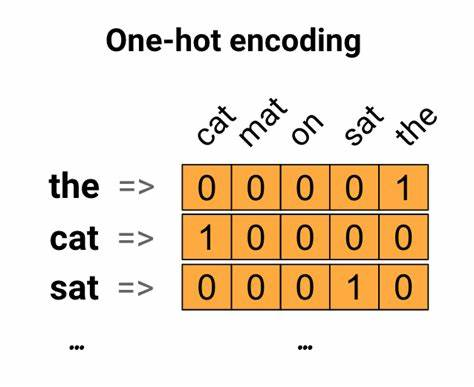

## implementations

In [10]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import one_hot

In [9]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
data = pd.read_csv("/content/twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data.columns = ["id","country", "label", "tweet"]
data.head()

,id,country,label,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
sent = data["tweet"]

In [6]:
sent

,tweet
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
74676,Just realized that the Windows partition of my...
74677,Just realized that my Mac window partition is ...
74678,Just realized the windows partition of my Mac ...
74679,Just realized between the windows partition of...


In [ ]:
corpus = []
lemmatizer = WordNetLemmatizer()
for i in range(len(sent)):
  rew = re.sub("[^a-zA-z]"," ",str(sent[i]))
  rew = rew.lower()
  rew = rew.split()
  rew = [lemmatizer.lemmatize(word) for word in rew if word not in stopwords.words("english")]
  rew = " ".join(rew)
  if rew not in corpus:
    corpus.append(rew)

In [24]:
corpus

['coming border kill',
 'im getting borderland kill',
 'im coming borderland murder',
 'im getting borderland murder',
 'spent hour making something fun know huge borderland fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pic twitter com mlsi wf jg',
 'spent couple hour something fun know huge borderland fan maya one favorite character decided make wallpaper pc original picture compared creation made fun pic twitter com mlsi wf jg',
 'spent hour something fun know huge borderland fan maya one favorite character',
 'spent hour making something fun know huge rhandlerr fan maya one favorite character decided make wallpaper pc original image versus creation made enjoy pic twitter com mlsi wf jg',
 '',
 'rock hard la varlope rare powerful handsome jackpot borderland xbox dlvr rmtrgf',
 'rock hard la varlope rare powerful handsome jackpot borderland xbox dfr rmtrgf',
 'rock hard la vita rare powerful handsome jackpot borderland xbox dlvr rm

In [26]:
voc_size = 100000

In [27]:
# one hot representation
one_hot_repr = [one_hot(word,voc_size) for word in corpus]

In [30]:
print(one_hot_repr[0])

[59128, 14867, 99667]


In [29]:
corpus[0]

'coming border kill'

In [32]:
one_hot_repr

[[59128, 14867, 99667],
 [73410, 45327, 33469, 99667],
 [73410, 59128, 33469, 1027],
 [73410, 45327, 33469, 1027],
 [7868,
  46873,
  15000,
  68122,
  51046,
  11321,
  83534,
  33469,
  39885,
  99988,
  77261,
  30457,
  33226,
  92986,
  28839,
  74394,
  86834,
  60570,
  58291,
  39140,
  37967,
  23805,
  53883,
  27375,
  14860,
  21697,
  46327,
  65574,
  96495],
 [7868,
  25257,
  46873,
  68122,
  51046,
  11321,
  83534,
  33469,
  39885,
  99988,
  77261,
  30457,
  33226,
  92986,
  28839,
  74394,
  86834,
  60570,
  30386,
  56712,
  37967,
  23805,
  51046,
  27375,
  14860,
  21697,
  46327,
  65574,
  96495],
 [7868,
  46873,
  68122,
  51046,
  11321,
  83534,
  33469,
  39885,
  99988,
  77261,
  30457,
  33226],
 [7868,
  46873,
  15000,
  68122,
  51046,
  11321,
  83534,
  98268,
  39885,
  99988,
  77261,
  30457,
  33226,
  92986,
  28839,
  74394,
  86834,
  60570,
  58291,
  39140,
  37967,
  23805,
  53883,
  27375,
  14860,
  21697,
  46327,
  65574,
  96